In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [34]:
dataframe = pd.read_csv(r"analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [29]:
dataframe.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [35]:
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


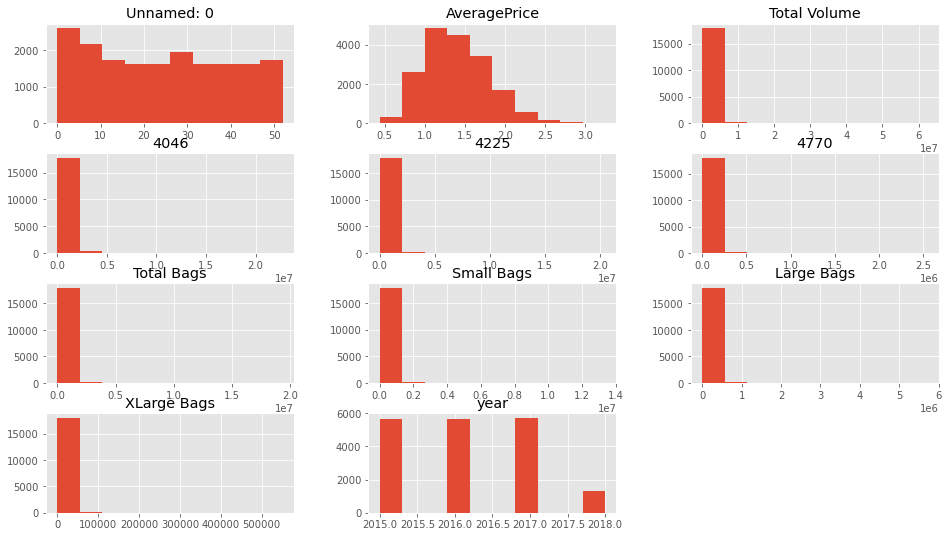

In [31]:
dataframe.drop(['type'],1).hist()
plt.show()

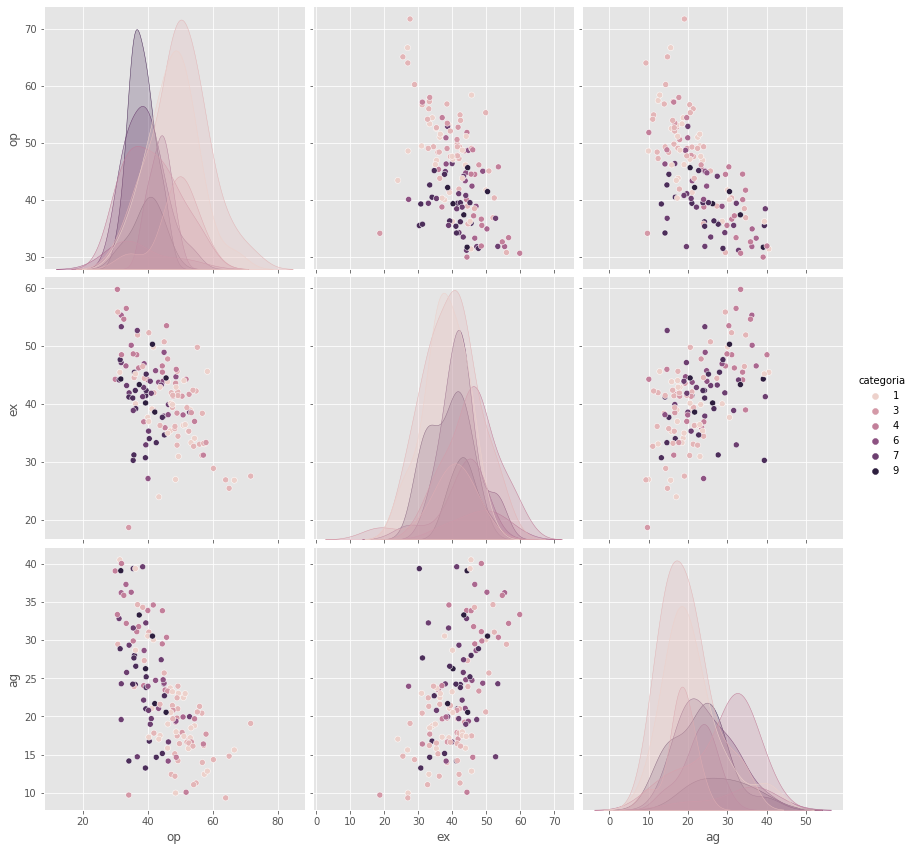

In [9]:
sb.pairplot(dataframe.dropna(), hue='categoria',height=4,vars=["op","ex","ag"],kind='scatter')

In [39]:
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape
print(y)

[7 7 4 2 4 7 7 5 7 7 3 1 1 2 8 3 4 6 2 4 2 3 3 7 2 4 8 1 4 3 8 1 2 7 4 5 1
 2 2 1 6 2 6 1 1 2 6 3 1 7 2 8 6 2 8 2 1 3 8 2 8 4 2 1 8 9 1 1 2 4 6 8 8 4
 9 2 8 4 4 9 5 2 4 1 2 7 2 3 2 1 2 7 2 2 1 7 7 2 4 6 1 1 1 4 2 4 2 8 7 5 9
 9 8 9 7 1 8 2 4 8 8 2 2 1 2 1 6 2 4 2 1 1 1 7 3 7 4 2 1 1]


['black', 'black', 'cyan', 'green', 'cyan', 'black', 'black', 'yellow', 'black', 'black', 'blue', 'red', 'red', 'green', 'pink', 'blue', 'cyan', 'orange', 'green', 'cyan', 'green', 'blue', 'blue', 'black', 'green', 'cyan', 'pink', 'red', 'cyan', 'blue', 'pink', 'red', 'green', 'black', 'cyan', 'yellow', 'red', 'green', 'green', 'red', 'orange', 'green', 'orange', 'red', 'red', 'green', 'orange', 'blue', 'red', 'black', 'green', 'pink', 'orange', 'green', 'pink', 'green', 'red', 'blue', 'pink', 'green', 'pink', 'cyan', 'green', 'red', 'pink', 'brown', 'red', 'red', 'green', 'cyan', 'orange', 'pink', 'pink', 'cyan', 'brown', 'green', 'pink', 'cyan', 'cyan', 'brown', 'yellow', 'green', 'cyan', 'red', 'green', 'black', 'green', 'blue', 'green', 'red', 'green', 'black', 'green', 'green', 'red', 'black', 'black', 'green', 'cyan', 'orange', 'red', 'red', 'red', 'cyan', 'green', 'cyan', 'green', 'pink', 'black', 'yellow', 'brown', 'brown', 'pink', 'brown', 'black', 'red', 'pink', 'green', 'cya

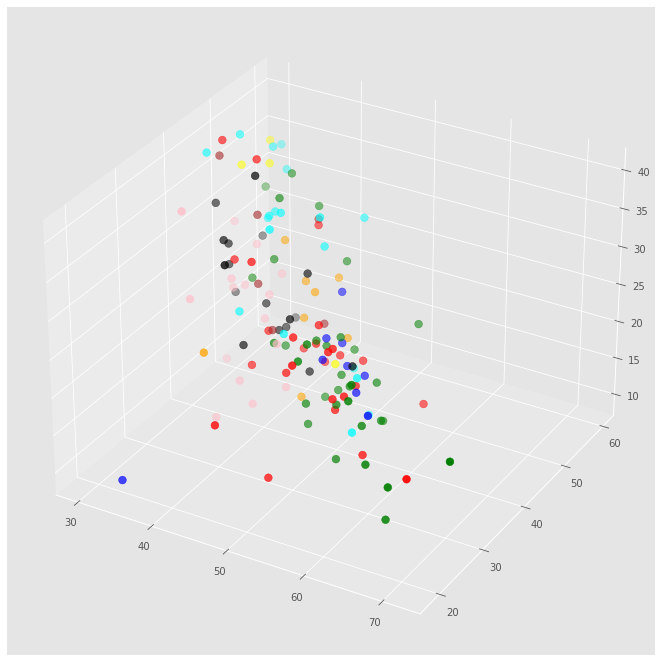

In [38]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
print(asignar)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

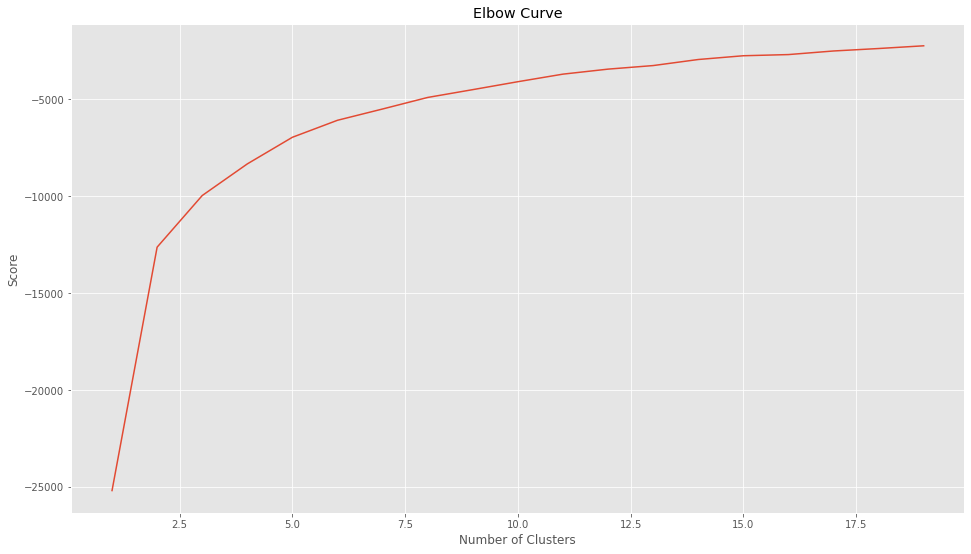

In [12]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [41]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[55.64220323 30.80609423 15.97972755]
 [36.82685335 45.68432773 31.07065427]
 [46.65027091 40.20758783 18.808574  ]]


[[39.98518668 43.35386426 23.32930742]
 [50.10094705 40.78004122 17.3972492 ]
 [35.90241306 47.56828232 33.58748762]
 [58.58657531 31.02839375 15.6120435 ]
 [42.968253   32.53013537 20.93305995]]


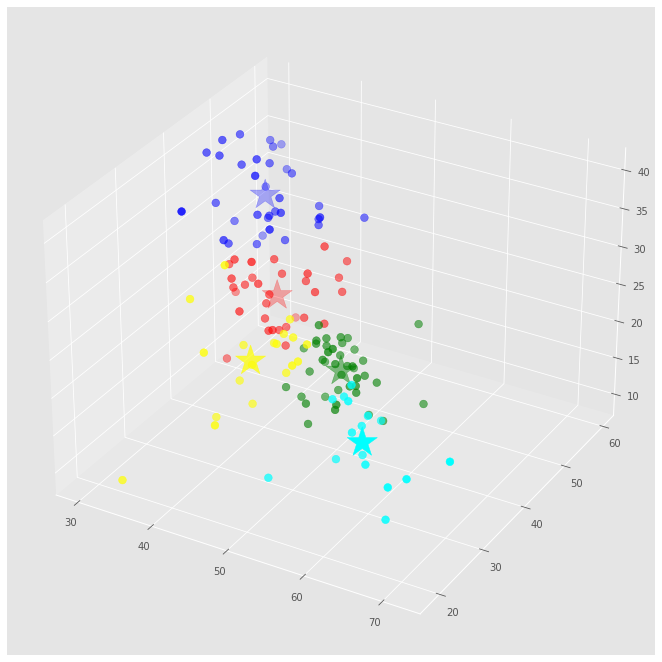

In [40]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
print(C)
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

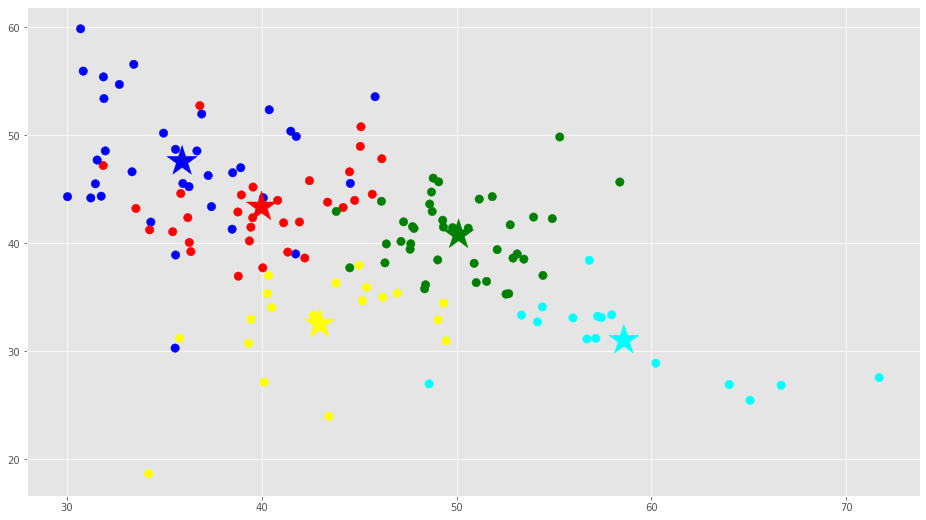

In [16]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ex'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

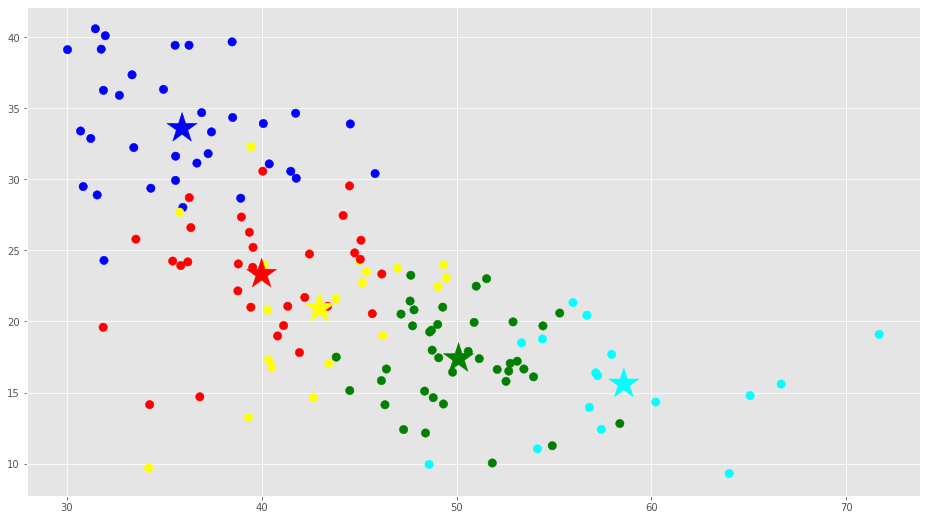

In [17]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

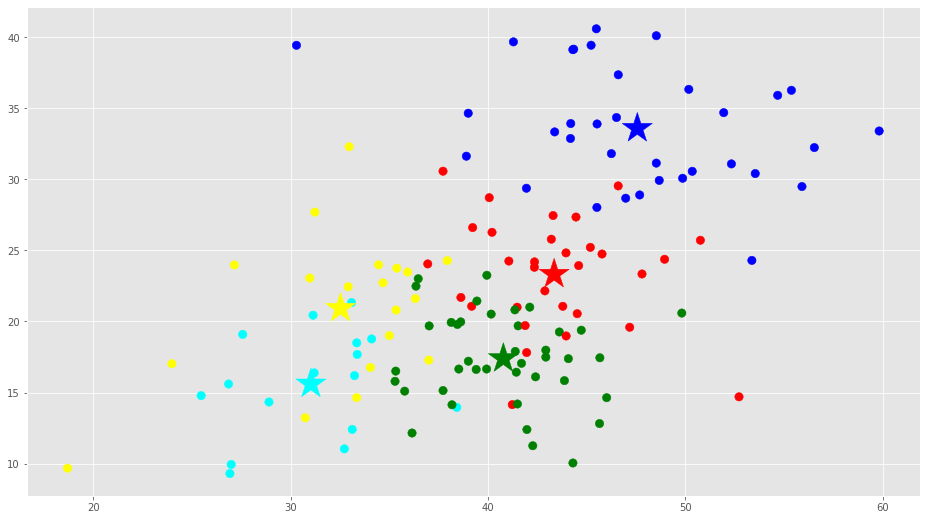

In [18]:
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [20]:
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,31
1,green,40
2,blue,34
3,cyan,16
4,yellow,19


In [46]:
group_referrer_index = copy['label'] == 0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

0      False
1      False
2      False
3      False
4      False
       ...  
135    False
136    False
137    False
138    False
139    False
Name: label, Length: 140, dtype: bool


,categoria,cantidad
0,0,NaN
1,1,3.0
2,2,4.0
3,3,1.0
4,4,2.0
5,5,NaN
6,6,4.0
7,7,7.0
8,8,7.0
9,9,3.0


In [23]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([ 64,  21,  98,  82, 120], dtype=int64)

ierrejon
carmenelectra
maria_patino
JudgeJudy
SarahPalinUSA


In [25]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta

new_labels = kmeans.predict(X_new)
print(new_labels)

[0]
